# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA


# Pembacaa Dataset dan Pembentukan Tabel

In [2]:
# Load the dataset
df = pd.read_csv("phising.csv")

# Display dataset shape and sample data
print(df.shape)
print(df['Abnormal_URL'].value_counts())
display(df.head())

(11055, 32)
Abnormal_URL
 1    9426
-1    1629
Name: count, dtype: int64


,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


# Preprocessing Mendeteksi Data yang Hilang atau Terduplikasi

In [3]:
import numpy as np

# Drop the 'index' column if exists
if 'index' in df.columns:
    df.drop('index', axis=1, inplace=True)

# Memeriksa apakah ada nilai yang hilang (NA) dalam DataFrame
missing_values = df.isna().sum()

# Menampilkan fitur-fitur yang memiliki nilai yang hilang
features_with_missing_values = missing_values[missing_values > 0]
if not features_with_missing_values.empty:
    print("Fitur-fitur dengan nilai yang hilang:")
    print(features_with_missing_values)
else:
    print("Tidak ada fitur dengan nilai yang hilang dalam data.")

# Memeriksa duplikasi dalam DataFrame
duplicated_rows = df[df.duplicated()]

# Jika ada baris yang terduplikasi, tampilkan informasinya
if not duplicated_rows.empty:
    print("Duplikasi dalam data:")
    print(duplicated_rows)
else:
    print("Tidak ada duplikasi dalam data.")

from scipy.stats import zscore

# Hitung z-score untuk setiap fitur
z_scores = df.apply(zscore)

# Tentukan threshold untuk mendeteksi outlier
threshold = 3

# Identifikasi outlier untuk setiap fitur
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Tampilkan informasi tentang outlier
if outliers.any().any():
    print("\nOutliers detected:")
    print(outliers)
else:
    print("\nNo outliers detected.")



Tidak ada fitur dengan nilai yang hilang dalam data.
Duplikasi dalam data:
       having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
180                             1             -1                   1   
203                             1             -1                   1   
323                             1             -1                   1   
364                             1             -1                   1   
381                             1             -1                   1   
...                           ...            ...                 ...   
11047                          -1             -1                   1   
11050                           1             -1                   1   
11051                          -1              1                   1   
11052                           1             -1                   1   
11053                          -1             -1                   1   

       having_At_Symbol  double_slash_redirecting  Prefix_Su

# Melihat Grafik dan Persebaran Setiap Fitur

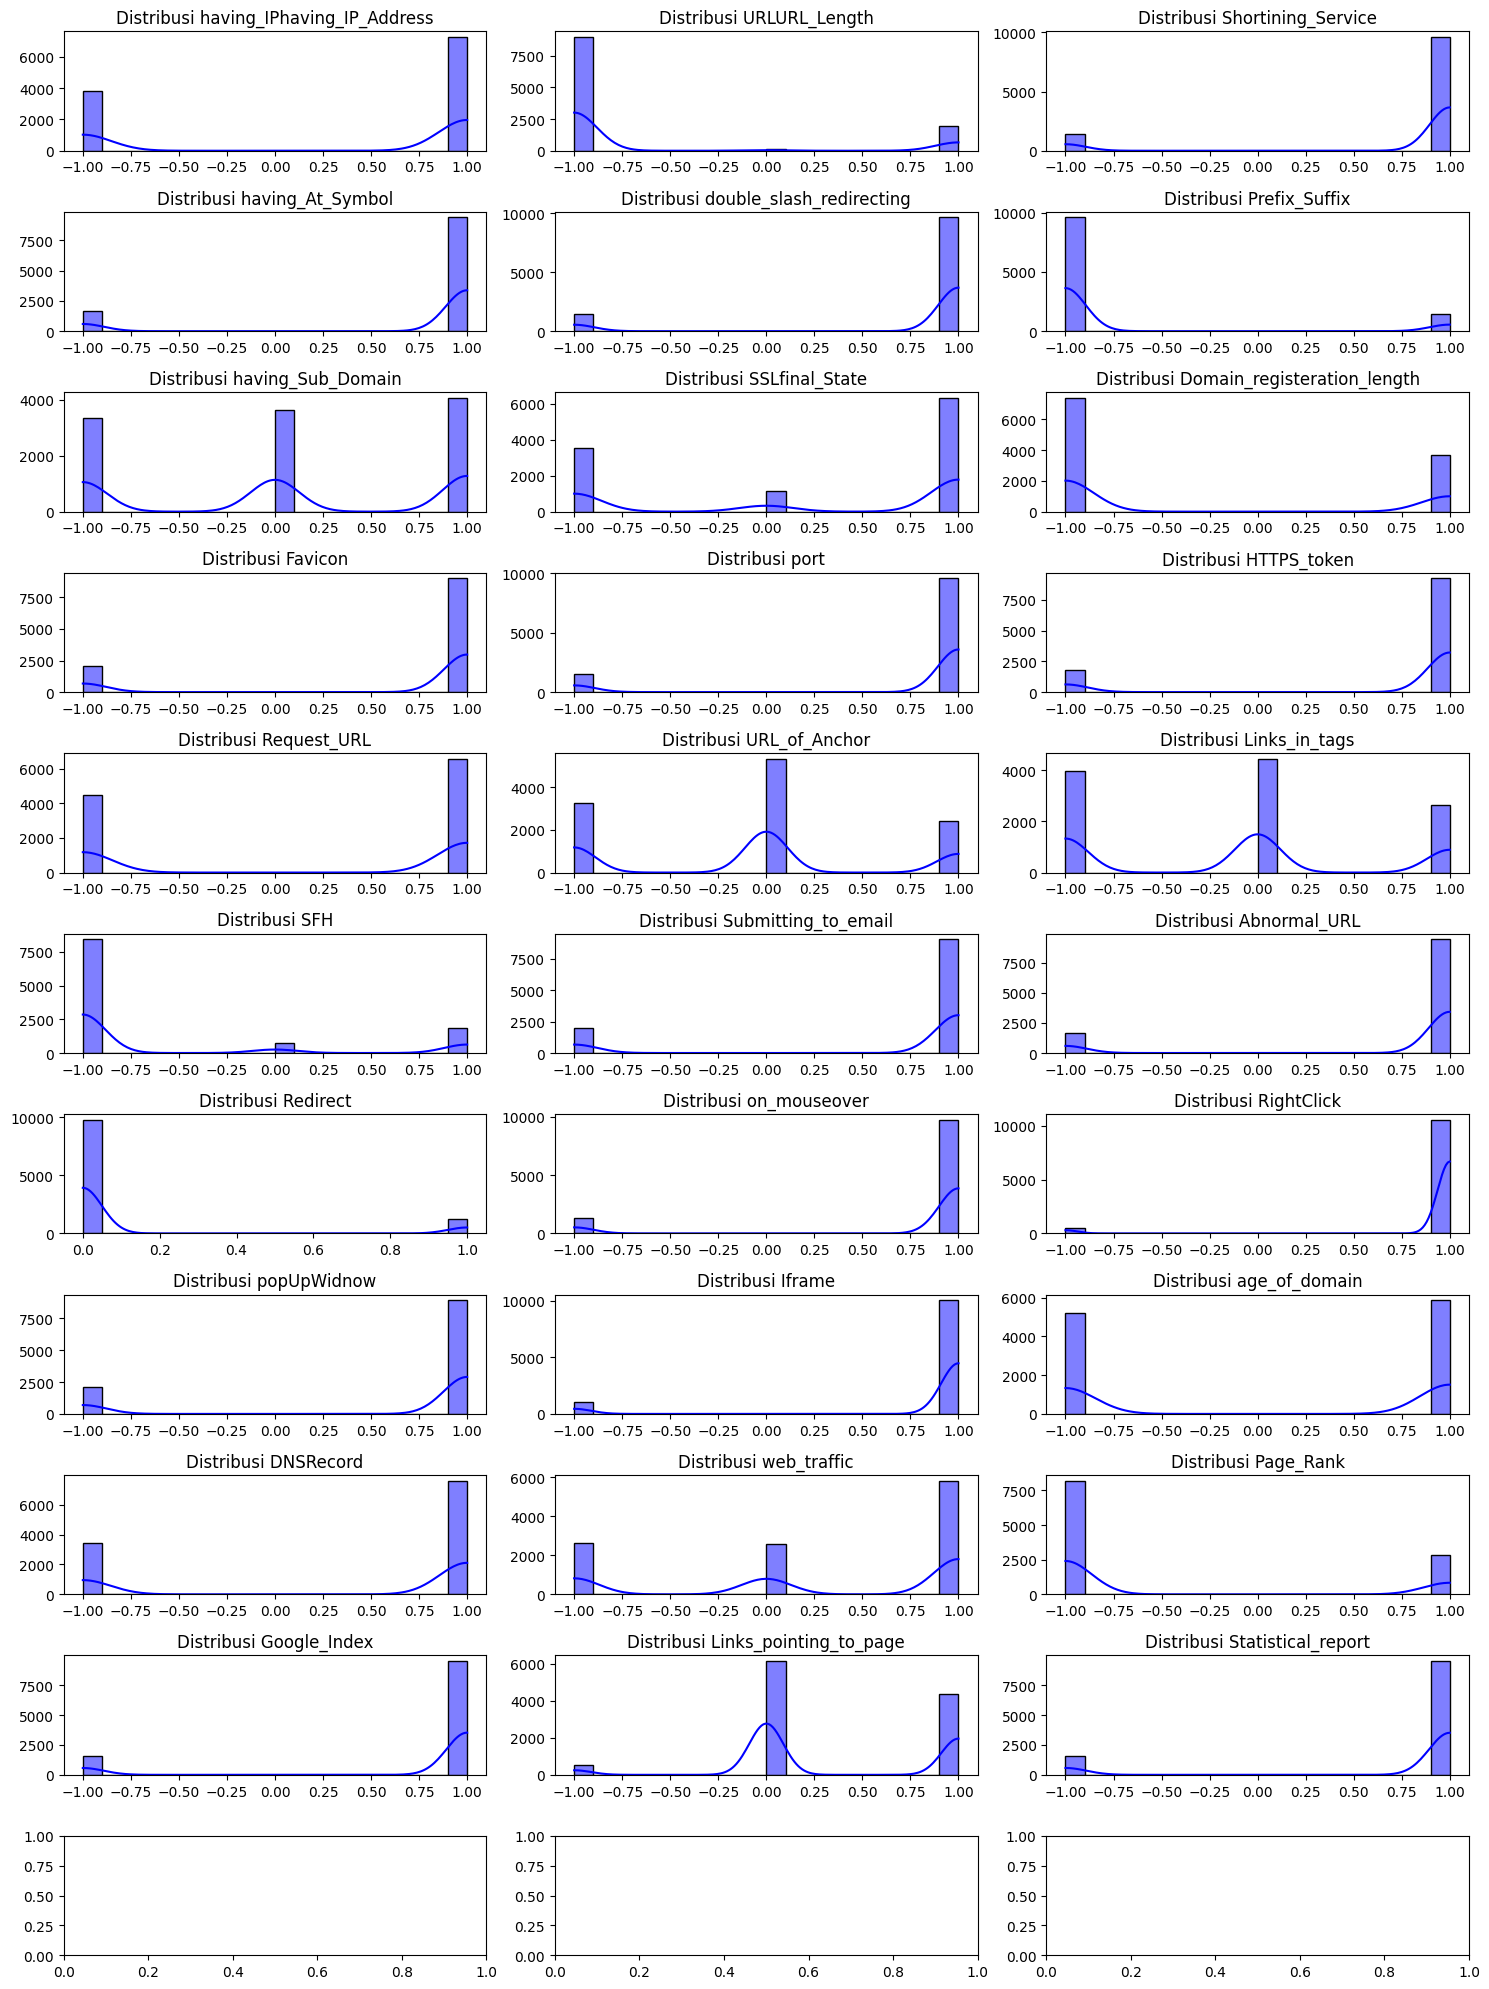

In [4]:
# Grafik Distribusi Setiap Fitur
features = df.columns.drop(['Result'])
fig, axes = plt.subplots(len(features)//3 + 1, 3, figsize=(15, 20))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.histplot(df[feature], bins=20, kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Distribusi {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
plt.tight_layout()
plt.show()

# Bar Plot Untuk Presentase Hasil

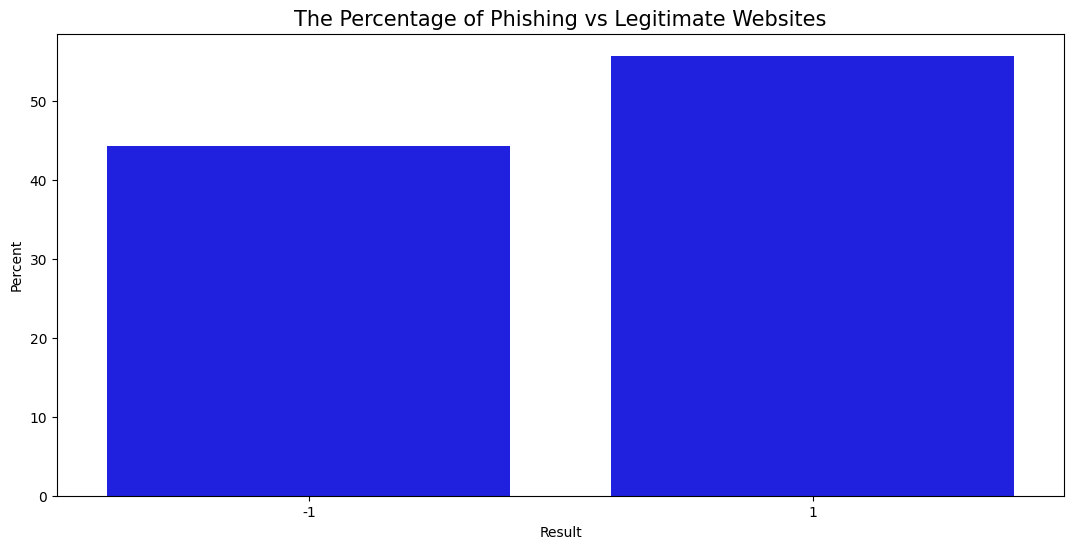

In [5]:
# Plot the percentage of phishing vs legitimate websites
plt.figure(figsize=(13, 6))
ax = sns.barplot(x="Result", y="Result", data=df, estimator=lambda x: len(x) / len(df) * 100, color='Blue')
ax.set(ylabel="Percent")
ax.set_title('The Percentage of Phishing vs Legitimate Websites', size=15)
plt.show()


# Split Data 50:50

In [6]:

# Splitting the data
X = df.drop('Result', axis=1)
y = df['Result']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.5, random_state=42)

In [7]:
# Standardize the features
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

# Split Data 60:40

In [8]:

# Splitting the data
X = df.drop('Result', axis=1)
y = df['Result']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.4, random_state=42)

In [9]:
# Standardize the features
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

# Split Data 66:33

In [10]:

# Splitting the data
X = df.drop('Result', axis=1)
y = df['Result']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
# Standardize the features
scaler = StandardScaler()
X_train3 = scaler.fit_transform(X_train3)
X_test3 = scaler.transform(X_test3)

# Split Data 70:30

In [12]:

# Splitting the data
X = df.drop('Result', axis=1)
y = df['Result']
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Standardize the features
scaler = StandardScaler()
X_train4 = scaler.fit_transform(X_train4)
X_test4 = scaler.transform(X_test4)

# Split Data 75:25

In [14]:

# Splitting the data
X = df.drop('Result', axis=1)
y = df['Result']
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
# Standardize the features
scaler = StandardScaler()
X_train5 = scaler.fit_transform(X_train5)
X_test5 = scaler.transform(X_test5)

# Split Data 80:20

In [16]:

# Splitting the data
X = df.drop('Result', axis=1)
y = df['Result']
X_train6, X_test6, y_train6, y_test6 = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Standardize the features
scaler = StandardScaler()
X_train6 = scaler.fit_transform(X_train6)
X_test6 = scaler.transform(X_test6)

# Split Data 90:10

In [18]:

# Splitting the data
X = df.drop('Result', axis=1)
y = df['Result']
X_train7, X_test7, y_train7, y_test7 = train_test_split(X, y, test_size=0.1, random_state=42)

In [19]:
# Standardize the features
scaler = StandardScaler()
X_train7 = scaler.fit_transform(X_train7)
X_test7 = scaler.transform(X_test7)

# Membandingkan Split

In [20]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Define train-test splits (replace with your actual train-test splits)
# Note: Make sure you have X_train1, X_train2, X_train3, X_train4, X_train5, X_train6, X_train7, y_train1, y_train2, y_train3, y_train4, y_train5, y_train6, y_train7 defined
train_test_splits = [
    (X_train1, y_train1, "50:50"),
    (X_train2, y_train2, "60:40"),
    (X_train3, y_train3, "66:33"),
    (X_train4, y_train4, "70:30"),
    (X_train5, y_train5, "75:25"),
    (X_train6, y_train6, "80:20"),
    (X_train7, y_train7, "90:10")
]

# Initialize a list to store the results
results = []

# Loop through train-test splits
for X_train_split, y_train_split, split_name in train_test_splits:
    # Calculate cross-validated mean accuracy
    cv_scores = cross_val_score(svm_model, X_train_split, y_train_split, cv=5, scoring='accuracy')
    cross_mean_value = np.mean(cv_scores)
    cross_error_value = 1 - cross_mean_value
    
    # Make predictions using cross-validation
    y_pred_cv = cross_val_predict(svm_model, X_train_split, y_train_split, cv=5)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_train_split, y_pred_cv)
    
    # Store the results in the list
    results.append({
        "Split": split_name,
        "Cross-Validated Mean Accuracy": cross_mean_value,
        "Cross-Validated Error Rate": cross_error_value,
        "Confusion Matrix": conf_matrix
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)

# Add a ranking column based on the Cross-Validated Mean Accuracy
results_df['Rank'] = results_df['Cross-Validated Mean Accuracy'].rank(ascending=False)

# Sort the DataFrame by Rank
results_df_sorted = results_df.sort_values('Rank')

# Display the sorted results DataFrame
results_df_sorted


,Split,Cross-Validated Mean Accuracy,Cross-Validated Error Rate,Confusion Matrix,Rank
4,75:25,0.951393,0.048607,"[[3463, 252], [151, 4425]]",1.0
6,90:10,0.950348,0.049652,"[[4098, 319], [175, 5357]]",2.0
5,80:20,0.950136,0.049864,"[[3662, 280], [161, 4741]]",3.0
1,60:40,0.949344,0.050656,"[[2777, 215], [121, 3520]]",4.0
3,70:30,0.949083,0.050917,"[[3214, 256], [138, 4130]]",5.0
2,66:33,0.948825,0.051175,"[[3085, 248], [131, 3942]]",6.0
0,50:50,0.947351,0.052649,"[[2311, 188], [103, 2925]]",7.0


In [21]:
#Menetapkan Variabel Utama Berdasarkan Split terbaik
X_train = X_train5
X_test = X_test5
y_train = y_train5
y_test = y_test5

# Mencari Parameter SVM Terbaik

In [22]:

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


# Initialize the SVM model
svm_model = SVC(random_state=42)

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=1)
grid_search.fit(X_train, y_train)


# Assuming grid_search is your GridSearchCV object
results_df = pd.DataFrame(grid_search.cv_results_)

# Select the relevant columns
results_table = results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

# Sort the table by 'rank_test_score' in ascending order
sorted_results_table = results_table.sort_values(by='rank_test_score')

# Display the sorted results
sorted_results_table.head()





,params,mean_test_score,std_test_score,rank_test_score
52,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}",0.964419,0.001122,1
36,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.962490,0.001675,2
20,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.960077,0.003237,3
22,"{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}",0.956338,0.002016,4
56,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}",0.955735,0.001228,5


In [23]:
# Perform GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


# Menggunakan Parameter SVM Terbaik dan Mengetes Data

In [24]:
# Initialize the SVM model with the best parameters
best_svm_model = SVC(**best_params, random_state=42)

# Train the model
best_svm_model.fit(X_train, y_train)

# Make predictions
y_pred = best_svm_model.predict(X_test)

# Calculate cross-validated mean accuracy
cv_scores = cross_val_score(best_svm_model, X_train, y_train, cv=5, scoring='accuracy')
cross_mean_value = np.mean(cv_scores)
cross_error_value = 1 - cross_mean_value

print(f"Cross-Validated Mean Accuracy: {cross_mean_value:.4f}")
print(f"Cross-Validated Error Rate: {cross_error_value:.4f}")

# Evaluate the model
print("SVM Model Training Score: ", best_svm_model.score(X_train, y_train))
print("SVM Model Testing Score: ", accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Phishing']))

Cross-Validated Mean Accuracy: 0.9660
Cross-Validated Error Rate: 0.0340
SVM Model Training Score:  0.9905922084187674
SVM Model Testing Score:  0.9634587554269175

              precision    recall  f1-score   support

  Legitimate       0.97      0.94      0.96      1183
    Phishing       0.96      0.98      0.97      1581

    accuracy                           0.96      2764
   macro avg       0.96      0.96      0.96      2764
weighted avg       0.96      0.96      0.96      2764



In [25]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

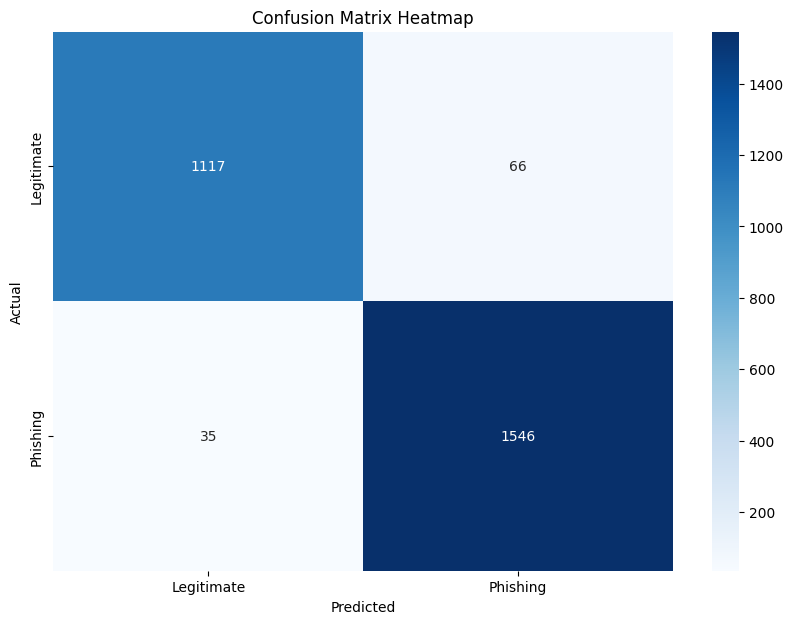

In [26]:
# Plotting the confusion matrix as heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Mencari Seleksi Fitur Terbaik

In [27]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, RFE, f_classif, mutual_info_classif, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler


# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Method 1: PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

best_svm_model.fit(X_train_pca, y_train)
y_pred_pca = best_svm_model.predict(X_test_pca)

# Evaluate PCA
accuracy_pca = accuracy_score(y_test, y_pred_pca)
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
report_pca = classification_report(y_test, y_pred_pca)
print("PCA Accuracy:", accuracy_pca)
print("PCA Confusion Matrix:")
print(conf_matrix_pca)
print("PCA Classification Report:")
print(report_pca)

# Method 2: SelectKBest (using f_classif)
kbest = SelectKBest(score_func=f_classif, k=2)
X_train_kbest = kbest.fit_transform(X_train, y_train)
X_test_kbest = kbest.transform(X_test)

best_svm_model.fit(X_train_kbest, y_train)
y_pred_kbest = best_svm_model.predict(X_test_kbest)

# Evaluate SelectKBest
accuracy_kbest = accuracy_score(y_test, y_pred_kbest)
conf_matrix_kbest = confusion_matrix(y_test, y_pred_kbest)
report_kbest = classification_report(y_test, y_pred_kbest)
print("\nSelectKBest Accuracy:", accuracy_kbest)
print("SelectKBest Confusion Matrix:")
print(conf_matrix_kbest)
print("SelectKBest Classification Report:")
print(report_kbest)

# Method 3: Recursive Feature Elimination (RFE)
linear_svm = SVC(kernel="linear", random_state=42)
rfe = RFE(estimator=linear_svm, n_features_to_select=2)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

linear_svm.fit(X_train_rfe, y_train)
y_pred_rfe = linear_svm.predict(X_test_rfe)

# Evaluate RFE
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
conf_matrix_rfe = confusion_matrix(y_test, y_pred_rfe)
report_rfe = classification_report(y_test, y_pred_rfe)
print("\nRFE Accuracy:", accuracy_rfe)
print("RFE Confusion Matrix:")
print(conf_matrix_rfe)
print("RFE Classification Report:")
print(report_rfe)

# Method 4: Mutual Information
mutual_info = SelectKBest(score_func=mutual_info_classif, k=2)
X_train_mi = mutual_info.fit_transform(X_train, y_train)
X_test_mi = mutual_info.transform(X_test)

best_svm_model.fit(X_train_mi, y_train)
y_pred_mi = best_svm_model.predict(X_test_mi)

# Evaluate Mutual Information
accuracy_mi = accuracy_score(y_test, y_pred_mi)
conf_matrix_mi = confusion_matrix(y_test, y_pred_mi)
report_mi = classification_report(y_test, y_pred_mi)
print("\nMutual Information Accuracy:", accuracy_mi)
print("Mutual Information Confusion Matrix:")
print(conf_matrix_mi)
print("Mutual Information Classification Report:")
print(report_mi)

# Method 5: Feature Importance from Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[-2:]

X_train_fi = X_train[:, indices]
X_test_fi = X_test[:, indices]

best_svm_model.fit(X_train_fi, y_train)
y_pred_fi = best_svm_model.predict(X_test_fi)

# Evaluate Feature Importance
accuracy_fi = accuracy_score(y_test, y_pred_fi)
conf_matrix_fi = confusion_matrix(y_test, y_pred_fi)
report_fi = classification_report(y_test, y_pred_fi)
print("\nFeature Importance Accuracy:", accuracy_fi)
print("Feature Importance Confusion Matrix:")
print(conf_matrix_fi)
print("Feature Importance Classification Report:")
print(report_fi)

# Method 6: L1-based feature selection (Lasso)
lasso = LassoCV().fit(X_train, y_train)
model = SelectFromModel(lasso, prefit=True, max_features=2)
X_train_lasso = model.transform(X_train)
X_test_lasso = model.transform(X_test)

best_svm_model.fit(X_train_lasso, y_train)
y_pred_lasso = best_svm_model.predict(X_test_lasso)

# Evaluate Lasso
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
conf_matrix_lasso = confusion_matrix(y_test, y_pred_lasso)
report_lasso = classification_report(y_test, y_pred_lasso)
print("\nLasso Accuracy:", accuracy_lasso)
print("Lasso Confusion Matrix:")
print(conf_matrix_lasso)
print("Lasso Classification Report:")
print(report_lasso)

# Create a DataFrame to display the results
results = {
    "Method": ["PCA", "SelectKBest", "RFE", "Mutual Information", "Feature Importance", "Lasso"],
    "Accuracy": [accuracy_pca, accuracy_kbest, accuracy_rfe, accuracy_mi, accuracy_fi, accuracy_lasso],
    "Confusion Matrix": [conf_matrix_pca, conf_matrix_kbest, conf_matrix_rfe, conf_matrix_mi, conf_matrix_fi, conf_matrix_lasso],
    "Classification Report": [report_pca, report_kbest, report_rfe, report_mi, report_fi, report_lasso]
}

results_df = pd.DataFrame(results)

# Rank the methods by accuracy
results_df['Rank'] = results_df['Accuracy'].rank(ascending=False).astype(int)
results_df = results_df.sort_values('Rank')

# Display the results DataFrame
results_df.head()


PCA Accuracy: 0.627713458755427
PCA Confusion Matrix:
[[ 343  840]
 [ 189 1392]]
PCA Classification Report:
              precision    recall  f1-score   support

          -1       0.64      0.29      0.40      1183
           1       0.62      0.88      0.73      1581

    accuracy                           0.63      2764
   macro avg       0.63      0.59      0.57      2764
weighted avg       0.63      0.63      0.59      2764


SelectKBest Accuracy: 0.9175108538350217
SelectKBest Confusion Matrix:
[[1055  128]
 [ 100 1481]]
SelectKBest Classification Report:
              precision    recall  f1-score   support

          -1       0.91      0.89      0.90      1183
           1       0.92      0.94      0.93      1581

    accuracy                           0.92      2764
   macro avg       0.92      0.91      0.92      2764
weighted avg       0.92      0.92      0.92      2764


RFE Accuracy: 0.912807525325615
RFE Confusion Matrix:
[[1042  141]
 [ 100 1481]]
RFE Classification Rep

,Method,Accuracy,Confusion Matrix,Classification Report,Rank
1,SelectKBest,0.917511,"[[1055, 128], [100, 1481]]",precision recall f1-score ...,2
3,Mutual Information,0.917511,"[[1055, 128], [100, 1481]]",precision recall f1-score ...,2
4,Feature Importance,0.917511,"[[1055, 128], [100, 1481]]",precision recall f1-score ...,2
5,Lasso,0.917511,"[[1055, 128], [100, 1481]]",precision recall f1-score ...,2
2,RFE,0.912808,"[[1042, 141], [100, 1481]]",precision recall f1-score ...,5


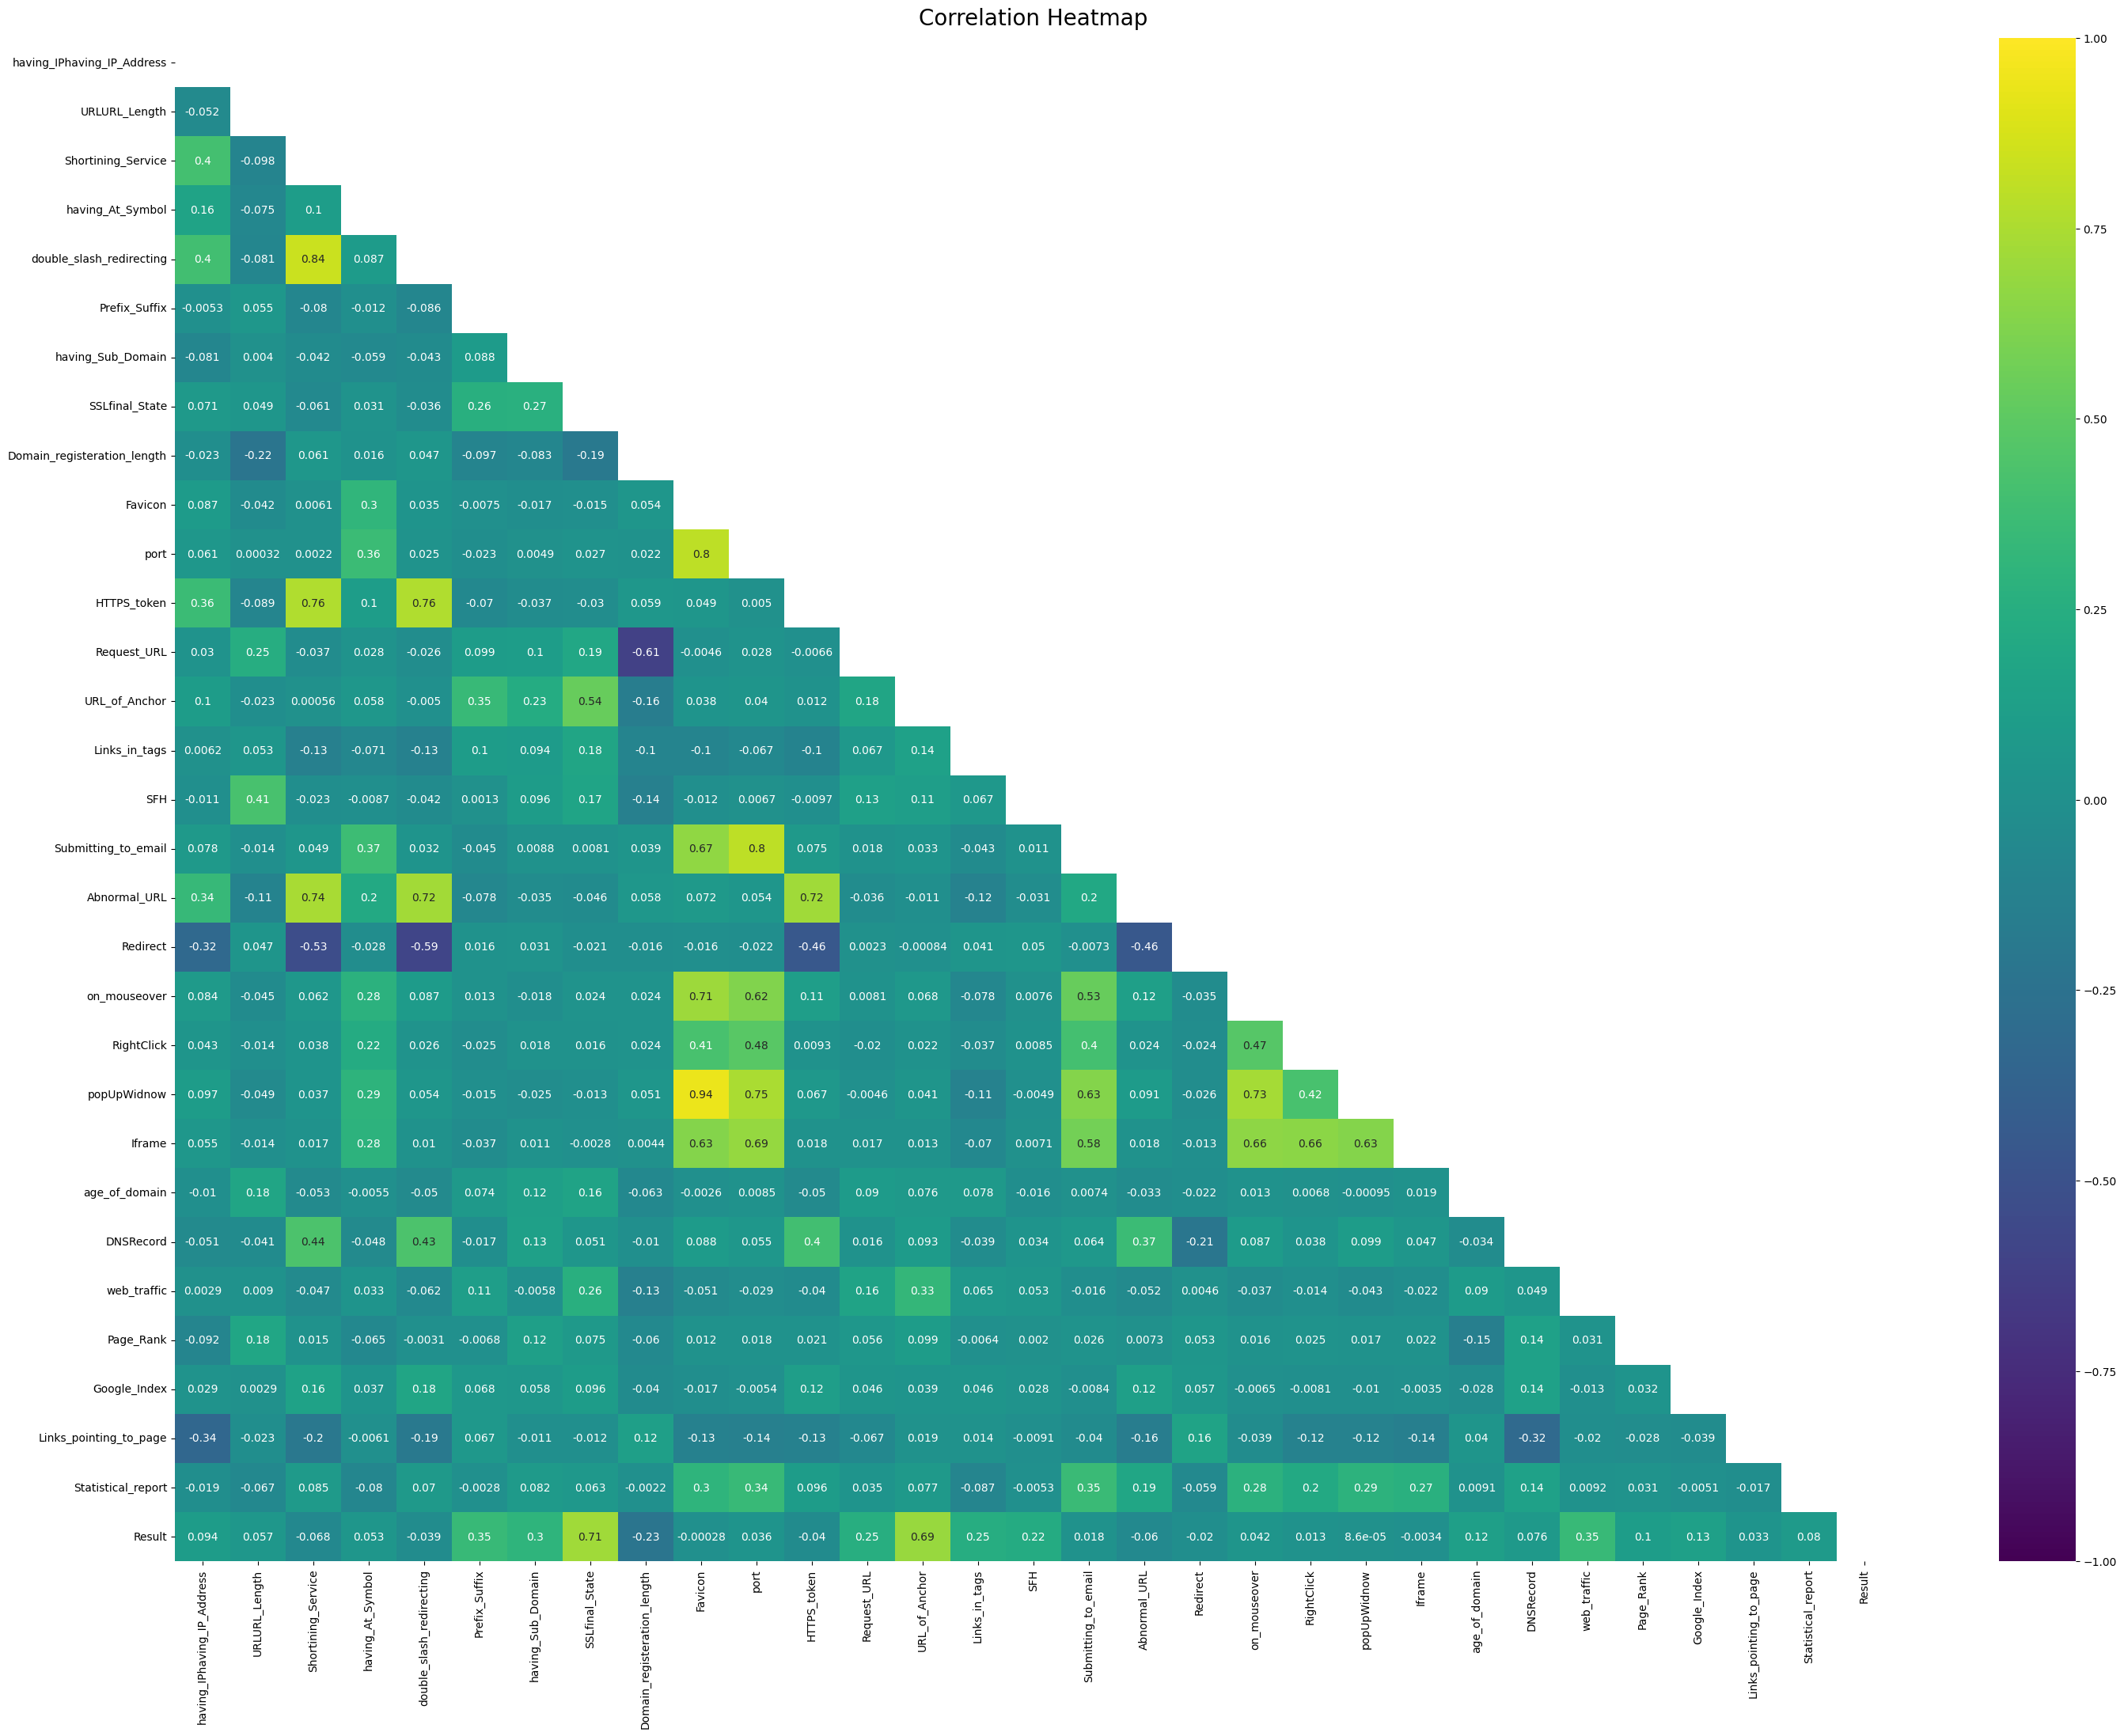

In [28]:
# Plot the correlation heatmap
plt.figure(figsize=(35, 25))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12)
plt.show()

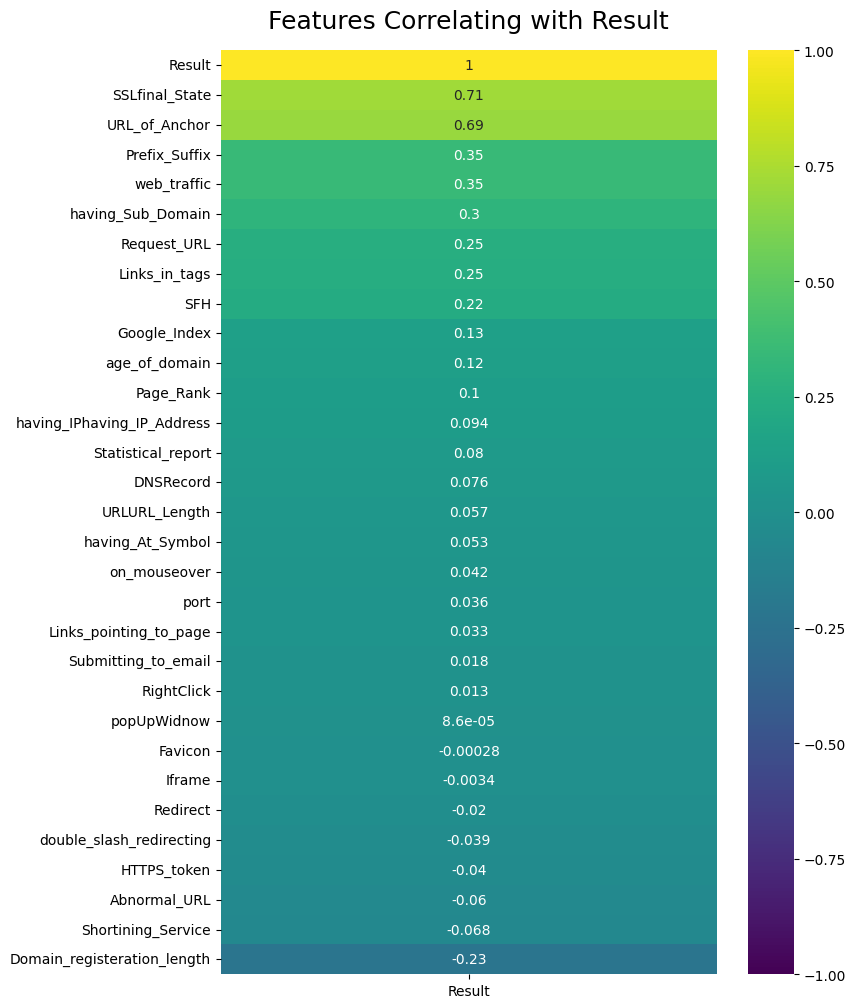

In [29]:
# Plot the features correlating with the result
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Result']].sort_values(by='Result', ascending=False), vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Features Correlating with Result', fontdict={'fontsize':18}, pad=16)
plt.show()

# Visualisasi Grafik dengan PCA

In [30]:
# Reduce dimensionality with PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

<Figure size 1200x600 with 0 Axes>

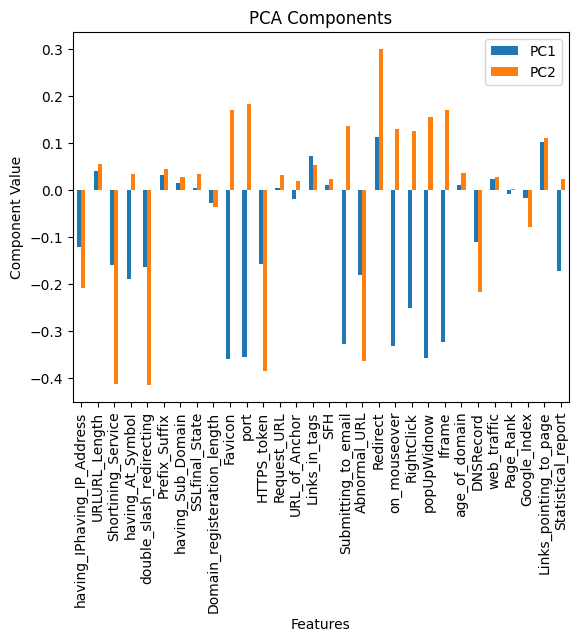

In [31]:
# Print PCA components to understand the identity of PC1 and PC2
components_df = pd.DataFrame(pca.components_, columns=df.columns[:-1], index=['PC1', 'PC2'])

# Plot PCA components
plt.figure(figsize=(12, 6))
components_df.T.plot(kind='bar')
plt.title('PCA Components')
plt.xlabel('Features')
plt.ylabel('Component Value')
plt.show()

In [32]:
# Train SVM on the reduced data
best_svm_model_pca = SVC(**best_params, random_state=42)
best_svm_model_pca.fit(X_train_pca, y_train)

SVC(C=100, gamma=0.1, random_state=42)

Text(0, 0.5, 'Principal Component 2')

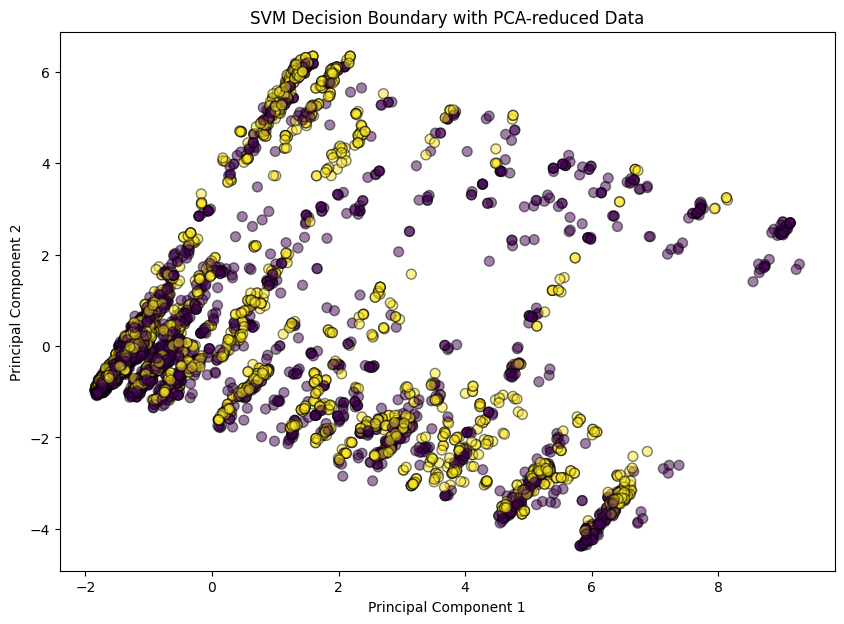

In [33]:
# Plot decision boundary
plt.figure(figsize=(10, 7))

# Plot training points
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', s=50, alpha=0.5, edgecolors='k', label='Train')
plt.title('SVM Decision Boundary with PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


In [34]:
# Create mesh to plot decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = best_svm_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])

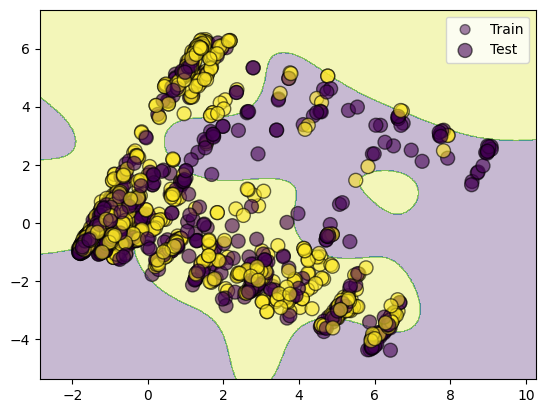

In [35]:
# Plot also the test points
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)
scatter2 = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', s=100, edgecolors='k', alpha=0.6, label='Test')
# Add legend
plt.legend(handles=[scatter, scatter2], labels=['Train', 'Test'])

plt.show()

# Visualisasi dengan SelectKBest method

Selected Features: ['SSLfinal_State', 'URL_of_Anchor']


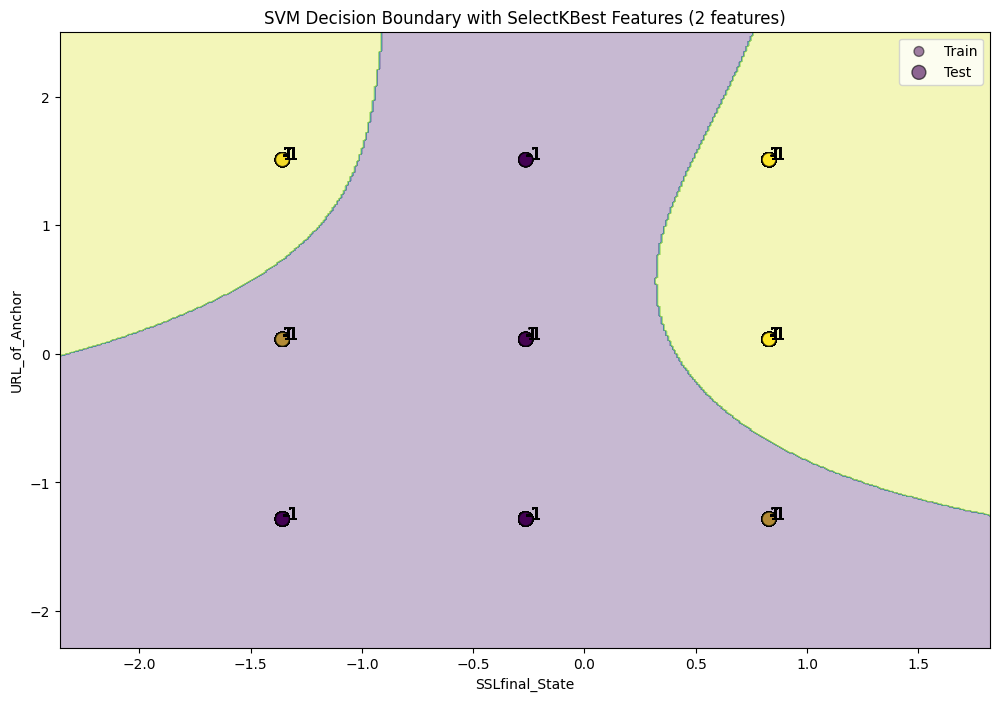

SelectKBest (2 features) Accuracy: 0.9175108538350217
SelectKBest (2 features) Confusion Matrix:
[[1055  128]
 [ 100 1481]]
SelectKBest (2 features) Classification Report:
              precision    recall  f1-score   support

          -1       0.91      0.89      0.90      1183
           1       0.92      0.94      0.93      1581

    accuracy                           0.92      2764
   macro avg       0.92      0.91      0.92      2764
weighted avg       0.92      0.92      0.92      2764



In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Ensure y_train and y_test are numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature selection using SelectKBest (using f_classif)
kbest = SelectKBest(score_func=f_classif, k=2)
X_train_kbest = kbest.fit_transform(X_train, y_train)
X_test_kbest = kbest.transform(X_test)

# Print selected features
selected_features = kbest.get_support(indices=True)
selected_feature_names = [X.columns[i] for i in selected_features]
print("Selected Features:", selected_feature_names)

# Visualize with only the first two features
X_train_kbest_2 = X_train_kbest[:, :2]
X_test_kbest_2 = X_test_kbest[:, :2]

# Initialize the best SVM model (assuming best parameters found previously)
best_svm_model_kbest_2 = SVC(**best_params, random_state=42)

# Train the SVM model on the selected features
best_svm_model_kbest_2.fit(X_train_kbest_2, y_train)

# Plot decision boundary
plt.figure(figsize=(12, 8))

# Plot training points with annotations
for i in range(len(X_train_kbest_2)):
    plt.annotate(y_train[i], (X_train_kbest_2[i, 0], X_train_kbest_2[i, 1]), fontsize=12, alpha=0.75)

# Plot training points
train_scatter = plt.scatter(X_train_kbest_2[:, 0], X_train_kbest_2[:, 1], c=y_train, cmap='viridis', s=50, alpha=0.5, edgecolors='k', label='Train')

# Create mesh to plot decision boundary
h = .01  # step size in the mesh (make it finer for better visualization)
x_min, x_max = X_train_kbest_2[:, 0].min() - 1, X_train_kbest_2[:, 0].max() + 1
y_min, y_max = X_train_kbest_2[:, 1].min() - 1, X_train_kbest_2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = best_svm_model_kbest_2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)

# Plot test points with annotations
for i in range(len(X_test_kbest_2)):
    plt.annotate(y_test[i], (X_test_kbest_2[i, 0], X_test_kbest_2[i, 1]), fontsize=12, alpha=0.75)

# Plot test points
test_scatter = plt.scatter(X_test_kbest_2[:, 0], X_test_kbest_2[:, 1], c=y_test, cmap='viridis', s=100, edgecolors='k', alpha=0.6, label='Test')

plt.title('SVM Decision Boundary with SelectKBest Features (2 features)')
plt.xlabel(selected_feature_names[0])
plt.ylabel(selected_feature_names[1])

# Add legend
plt.legend(handles=[train_scatter, test_scatter], labels=['Train', 'Test'])

plt.show()

# Make predictions on the test set
y_pred_kbest_2 = best_svm_model_kbest_2.predict(X_test_kbest_2)

# Evaluate the model
accuracy_kbest_2 = accuracy_score(y_test, y_pred_kbest_2)
conf_matrix_kbest_2 = confusion_matrix(y_test, y_pred_kbest_2)
report_kbest_2 = classification_report(y_test, y_pred_kbest_2)

print("SelectKBest (2 features) Accuracy:", accuracy_kbest_2)
print("SelectKBest (2 features) Confusion Matrix:")
print(conf_matrix_kbest_2)
print("SelectKBest (2 features) Classification Report:")
print(report_kbest_2)


Selected Features: ['Prefix_Suffix', 'SSLfinal_State', 'URL_of_Anchor']


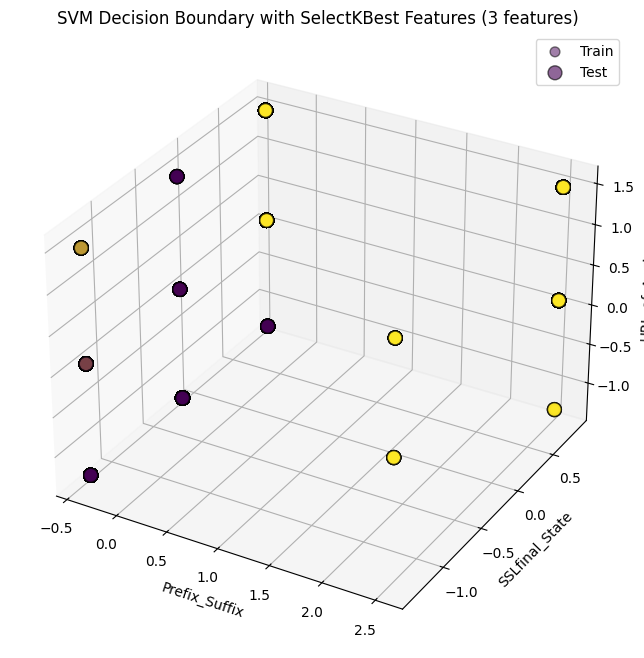

SelectKBest (3 features) Accuracy: 0.918958031837916
SelectKBest (3 features) Confusion Matrix:
[[1071  112]
 [ 112 1469]]
SelectKBest (3 features) Classification Report:
              precision    recall  f1-score   support

          -1       0.91      0.91      0.91      1183
           1       0.93      0.93      0.93      1581

    accuracy                           0.92      2764
   macro avg       0.92      0.92      0.92      2764
weighted avg       0.92      0.92      0.92      2764



In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Ensure y_train and y_test are numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature selection using SelectKBest (using f_classif)
kbest = SelectKBest(score_func=f_classif, k=3)
X_train_kbest = kbest.fit_transform(X_train, y_train)
X_test_kbest = kbest.transform(X_test)

# Print selected features
selected_features = kbest.get_support(indices=True)
selected_feature_names = [X.columns[i] for i in selected_features]
print("Selected Features:", selected_feature_names)

# Initialize the best SVM model (assuming best parameters found previously)
best_svm_model_kbest_3 = SVC(**best_params, random_state=42)

# Train the SVM model on the selected features
best_svm_model_kbest_3.fit(X_train_kbest, y_train)

# Plot decision boundary
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot training points
sc = ax.scatter(X_train_kbest[:, 0], X_train_kbest[:, 1], X_train_kbest[:, 2], c=y_train, cmap='viridis', s=50, alpha=0.5, edgecolors='k', label='Train')

# Plot test points
sc = ax.scatter(X_test_kbest[:, 0], X_test_kbest[:, 1], X_test_kbest[:, 2], c=y_test, cmap='viridis', s=100, edgecolors='k', alpha=0.6, label='Test')

plt.title('SVM Decision Boundary with SelectKBest Features (3 features)')
ax.set_xlabel(selected_feature_names[0])
ax.set_ylabel(selected_feature_names[1])
ax.set_zlabel(selected_feature_names[2])

# Add legend
ax.legend()

plt.show()

# Make predictions on the test set
y_pred_kbest_3 = best_svm_model_kbest_3.predict(X_test_kbest)

# Evaluate the model
accuracy_kbest_3 = accuracy_score(y_test, y_pred_kbest_3)
conf_matrix_kbest_3 = confusion_matrix(y_test, y_pred_kbest_3)
report_kbest_3 = classification_report(y_test, y_pred_kbest_3)

print("SelectKBest (3 features) Accuracy:", accuracy_kbest_3)
print("SelectKBest (3 features) Confusion Matrix:")
print(conf_matrix_kbest_3)
print("SelectKBest (3 features) Classification Report:")
print(report_kbest_3)


# Mencari Jumlah K Paling Akurat

In [38]:
results = []

for k in range(1, 31):
    # Feature selection using SelectKBest
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train, y_train)
    X_test_kbest = kbest.transform(X_test)

    # Train the SVM model on the selected features
    svm_model = SVC(**best_params, random_state=42)
    svm_model.fit(X_train_kbest, y_train)

    # Evaluate the model
    accuracy = accuracy_score(y_test, svm_model.predict(X_test_kbest))
    results.append((k, accuracy))

# Sort the results based on accuracy in descending order
results.sort(key=lambda x: x[1], reverse=True)

# Print the results in a tabular format
print("K\tAccuracy")
print("-" * 15)
for k, accuracy in results:
    print(f"{k}\t{accuracy:.4f}")


K	Accuracy
---------------
28	0.9645
29	0.9638
27	0.9635
30	0.9635
26	0.9624
25	0.9613
23	0.9609
24	0.9609
17	0.9588
18	0.9580
22	0.9573
21	0.9566
19	0.9559
20	0.9559
15	0.9548
16	0.9537
14	0.9515
13	0.9512
12	0.9497
11	0.9486
8	0.9425
9	0.9403
10	0.9396
7	0.9392
5	0.9331
6	0.9305
4	0.9237
3	0.9190
2	0.9175
1	0.8900


In [39]:
best_k = 28

# Feature selection using SelectKBest with best_k
kbest = SelectKBest(score_func=f_classif, k=best_k)
X_train_kbest = kbest.fit_transform(X_train, y_train)
X_test_kbest = kbest.transform(X_test)

# Train the SVM model on the selected features
best_svm_model_final = SVC(**best_params, random_state=42)
best_svm_model_final.fit(X_train_kbest, y_train)

# Evaluate the model
y_pred_best = best_svm_model_final.predict(X_test_kbest)
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)

print("Best Model (K =", best_k, ") Accuracy:", accuracy_best)
print("Best Model (K =", best_k, ") Confusion Matrix:")
print(conf_matrix_best)
print("Best Model (K =", best_k, ") Classification Report:")
print(report_best)

# Print selected features
selected_features = kbest.get_support(indices=True)
selected_feature_names = [X.columns[i] for i in selected_features]
print("Selected Features for Best Model (K = 28):", selected_feature_names)


Best Model (K = 28 ) Accuracy: 0.9645441389290883
Best Model (K = 28 ) Confusion Matrix:
[[1120   63]
 [  35 1546]]
Best Model (K = 28 ) Classification Report:
              precision    recall  f1-score   support

          -1       0.97      0.95      0.96      1183
           1       0.96      0.98      0.97      1581

    accuracy                           0.96      2764
   macro avg       0.97      0.96      0.96      2764
weighted avg       0.96      0.96      0.96      2764

Selected Features for Best Model (K = 28): ['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_p

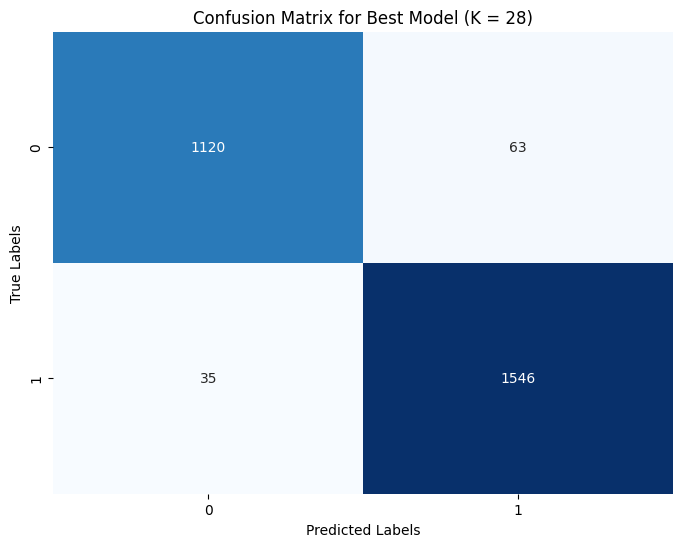

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Best Model (K = 28)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


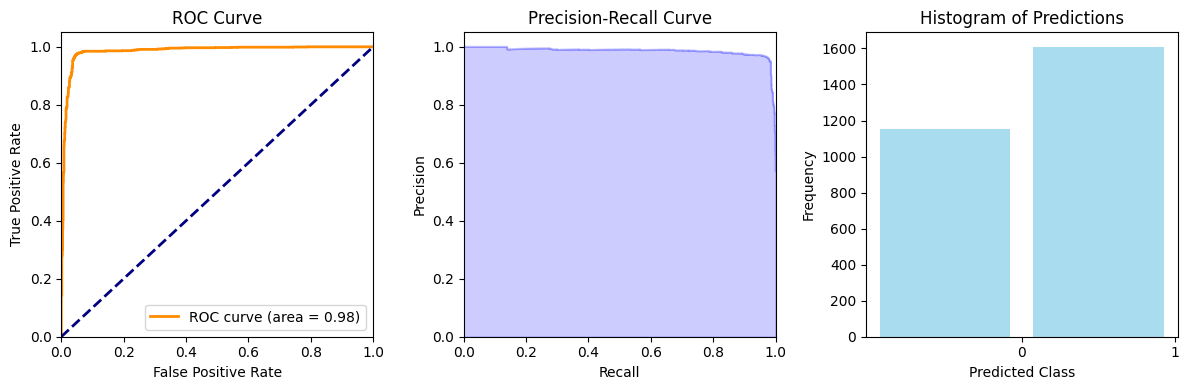

In [41]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, best_svm_model_final.decision_function(X_test_kbest))
roc_auc = auc(fpr, tpr)

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, best_svm_model_final.decision_function(X_test_kbest))

# Histogram of predictions
predictions = best_svm_model_final.predict(X_test_kbest)

# Plot ROC curve
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Plot precision-recall curve
plt.subplot(1, 3, 2)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

# Plot histogram of predictions
plt.subplot(1, 3, 3)
plt.hist(predictions, bins=2, color='skyblue', alpha=0.7, rwidth=0.85)
plt.xlabel('Predicted Class')
plt.ylabel('Frequency')
plt.title('Histogram of Predictions')
plt.xticks([0, 1])

plt.tight_layout()
plt.show()


# Pengaplikasian Lewat User Input Model Split 75:25, Best Parameters, dan SelectKBest

In [42]:
# Menerima input dari pengguna
input_features = []
selected_features_indices = kbest.get_support(indices=True)  # Mendapatkan indeks fitur yang dipilih

for index in selected_features_indices:
    feature = X.columns[index]
    value = float(input("Masukkan nilai 1 jika Legitimate, 0 jika Suspicious, -1 jika Phising  untuk {}: ".format(feature)))
    input_features.append(value)

# Pra-pemrosesan input
input_features = np.array(input_features).reshape(1, -1)  # Ubah menjadi array 2 dimensi untuk kompatibilitas dengan pemrosesan model

# Fitur-fitur yang dipilih oleh SelectKBest
X_train_selected = X_train[:, selected_features_indices]

# Skala data pelatihan yang dipilih
scaler_selected = StandardScaler()
X_train_selected_scaled = scaler_selected.fit_transform(X_train_selected)

# Transformasi data input pengguna menggunakan scaler yang sesuai
input_features_scaled = scaler_selected.transform(input_features)

# Prediksi dan tampilkan hasil
prediction = best_svm_model_final.predict(input_features_scaled)
if prediction == 1:
    print("Data Website tersebut diprediksi sebagai Legitimate")
else:
    print("Data Website tersebut diprediksi sebagai Phishing.")


Data Website tersebut diprediksi sebagai Legitimate


# Import Pickle Rick

In [43]:
import pickle

# Misalkan model, scaler, dan kbest sudah dilatih
# best_svm_model_final, scaler, dan kbest

# Simpan model ke file model.pkl
with open('model/model.pkl', 'wb') as file:
    pickle.dump(best_svm_model_final, file)

# Simpan scaler ke file scaler.pkl
with open('model/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Simpan SelectKBest ke file kbest.pkl
with open('model/kbest.pkl', 'wb') as file:
    pickle.dump(kbest, file)
